<a href="https://colab.research.google.com/github/siren7075/TradingAgentRL/blob/main/TradingAgentFinRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental version derived from https://github.com/benstaf/FinRL_DeepSeek?tab=readme-ov-file. This project aims to give trading advice based on real time market environment.

# Part 1. Install and Load Packages

In [1]:
#6min
!pip install git+https://github.com/benstaf/FinRL.git
!pip install selenium webdriver-manager alpaca-py datasets
!git clone https://github.com/benstaf/FinRL_DeepSeek.git
%cd FinRL_DeepSeek
!bash installation_script.sh
!pip install transformers datasets huggingface_hub stable-baselines3
!pip install yfinance==0.2.58

  Cloning https://github.com/benstaf/FinRL.git to /tmp/pip-req-build-9yqojezm
  Running command git clone --filter=blob:none --quiet https://github.com/benstaf/FinRL.git /tmp/pip-req-build-9yqojezm
  Resolved https://github.com/benstaf/FinRL.git to commit cd016b667da1860939b43bb77aba7ff4e35f780f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-fmqzvnln/elegantrl_b8de9ae48a6b4d979c825319bdcdca61
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-fmqzvnln/elegantrl_b8de9ae48a6b4d979c825319bdcdca61
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit 8ea76afc3e7f1564ae9f0e69e70254116d575fe9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━

In [2]:
from huggingface_hub import snapshot_download
import shutil

# Download the entire repo
local_dir = snapshot_download(repo_id="benstaf/Trading_agents")

# Optional: move all files to root /content
shutil.copytree(local_dir, "/content", dirs_exist_ok=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

(…)cppo_deepseek_100_epochs_20k_steps_1.pth:   0%|          | 0.00/6.42M [00:00<?, ?B/s]

agent_cppo_llama_20_epochs_20k_steps.pth:   0%|          | 0.00/6.42M [00:00<?, ?B/s]

agent_cppo_100_epochs_20k_steps.pth:   0%|          | 0.00/5.73M [00:00<?, ?B/s]

(…)ppo_deepseek_100_epochs_20k_steps_01.pth:   0%|          | 0.00/6.42M [00:00<?, ?B/s]

(…)t_cppo_deepseek_100_epochs_20k_steps.pth:   0%|          | 0.00/6.42M [00:00<?, ?B/s]

agent_deepseek_20_epochs_20k_steps.pth:   0%|          | 0.00/6.42M [00:00<?, ?B/s]

agent_cppo_20_epochs_20k_steps.pth:   0%|          | 0.00/5.73M [00:00<?, ?B/s]

agent_ppo_100_epochs_20k_steps.pth:   0%|          | 0.00/5.73M [00:00<?, ?B/s]

(…)_ppo_deepseek_100_epochs_20k_steps_1.pth:   0%|          | 0.00/6.07M [00:00<?, ?B/s]

(…)nt_ppo_deepseek_100_epochs_20k_steps.pth:   0%|          | 0.00/6.07M [00:00<?, ?B/s]

(…)ent_ppo_deepseek_20_epochs_20k_steps.pth:   0%|          | 0.00/6.07M [00:00<?, ?B/s]

(…)ppo_deepseek_100_epochs_20k_steps_01.pth:   0%|          | 0.00/6.07M [00:00<?, ?B/s]

agent_ppo_llama_20_epochs_20k_steps.pth:   0%|          | 0.00/6.07M [00:00<?, ?B/s]

agent_ppo_llama_100_epochs_20k_steps.pth:   0%|          | 0.00/6.07M [00:00<?, ?B/s]

agent_ppo_20_epochs_20k_steps.pth:   0%|          | 0.00/5.73M [00:00<?, ?B/s]

'/content'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

#from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.config import INDICATORS, TRAINED_MODEL_DIR
from env_stocktrading import StockTradingEnv


# Import PPO-DeepSeek environments
from env_stocktrading_llm import StockTradingEnv as StockTradingEnv_llm
from env_stocktrading_llm_1 import StockTradingEnv as StockTradingEnv_llm_1
from env_stocktrading_llm_01 import StockTradingEnv as StockTradingEnv_llm_01

# Import CPPO-DeepSeek risk environments
from env_stocktrading_llm_risk import StockTradingEnv as StockTradingEnv_llm_risk
from env_stocktrading_llm_risk_1 import StockTradingEnv as StockTradingEnv_llm_risk_1
from env_stocktrading_llm_risk_01 import StockTradingEnv as StockTradingEnv_llm_risk_01

#from env_stocktrading_llm import StockTradingEnv as StockTradingEnv_llm

#from env_stocktrading_llm_risk import StockTradingEnv as StockTradingEnv_llm_risk


#from finrl.meta.env_stock_trading.env_stocktrading_llm import StockTradingEnv
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader


from datasets import load_dataset

%matplotlib inline

# Part 2. Prepare for Agent Prediction

In [4]:
# from Huggging Face :
dataset = load_dataset("benstaf/nasdaq_2013_2023", data_files='trade_data_deepseek_sentiment_2019_2023.csv')

# Convert to pandas DataFrame
trade = pd.DataFrame(dataset['train'])

#trade= pd.read_csv('/content/machine_learning/trade_data_qwen_sentiment.csv')

trade = trade.drop('Unnamed: 0',axis=1)

# Create a new index based on unique dates
unique_dates = trade['date'].unique()
date_to_idx = {date: idx for idx, date in enumerate(unique_dates)}

# Create new index based on the date mapping
trade['new_idx'] = trade['date'].map(date_to_idx)

# Set this as the index
trade = trade.set_index('new_idx')


#missing values with 0
trade['llm_sentiment'].fillna(0, inplace=True)
trade_llm=trade


#trade = pd.read_csv('/content/machine_learning/trade_data_qwen_risk.csv')

# from Huggging Face :
dataset = load_dataset("benstaf/nasdaq_2013_2023", data_files='trade_data_deepseek_risk_2019_2023.csv')

# Convert to pandas DataFrame
trade = pd.DataFrame(dataset['train'])

trade = trade.drop('Unnamed: 0',axis=1)

# Create a new index based on unique dates
unique_dates = trade['date'].unique()
date_to_idx = {date: idx for idx, date in enumerate(unique_dates)}

# Create new index based on the date mapping
trade['new_idx'] = trade['date'].map(date_to_idx)

# Set this as the index
trade = trade.set_index('new_idx')


#missing values with 0
trade['llm_sentiment'].fillna(0, inplace=True)
#missing values with 3
trade['llm_risk'].fillna(3, inplace=True)
trade_llm_risk=trade

#trade = pd.read_csv('/content/machine_learning/trade_data_qwen_risk.csv')

# from Huggging Face :
dataset = load_dataset("benstaf/nasdaq_2013_2023", data_files='trade_data_2019_2023.csv')

# Convert to pandas DataFrame
trade = pd.DataFrame(dataset['train'])

trade = trade.drop('Unnamed: 0',axis=1)

# Create a new index based on unique dates
unique_dates = trade['date'].unique()
date_to_idx = {date: idx for idx, date in enumerate(unique_dates)}

# Create new index based on the date mapping
trade['new_idx'] = trade['date'].map(date_to_idx)

# Set this as the index
trade = trade.set_index('new_idx')



README.md:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


(…)de_data_deepseek_sentiment_2019_2023.csv:   0%|          | 0.00/31.0M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

<ipython-input-4-ac356afdb492>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trade['llm_sentiment'].fillna(0, inplace=True)
Repo card metadata block was not found. Setting CardData to empty.


trade_data_deepseek_risk_2019_2023.csv:   0%|          | 0.00/31.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

<ipython-input-4-ac356afdb492>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trade['llm_sentiment'].fillna(0, inplace=True)
<ipython-input-4-ac356afdb492>:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

trade_data_2019_2023.csv:   0%|          | 0.00/30.5M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [5]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2 * stock_dimension + len(INDICATORS) * stock_dimension #+ stock_dimension # +LLM sentiment
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

stock_dimension_llm = len(trade_llm.tic.unique())
state_space_llm = 1 + 2 * stock_dimension_llm + (1+len(INDICATORS)) * stock_dimension_llm #+ stock_dimension # +LLM sentiment
print(f"Stock Dimension: {stock_dimension_llm}, State Space: {state_space_llm}")

stock_dimension = len(trade.tic.unique())
state_space_llm_risk = 1 + 2 * stock_dimension + (2+len(INDICATORS)) * stock_dimension #+ stock_dimension # +LLM sentiment + LLM risk
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space_llm_risk}")

buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

buy_cost_list_llm = sell_cost_list_llm = [0.001] * stock_dimension_llm
num_stock_shares_llm = [0] * stock_dimension_llm

env_kwargs_llm = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares_llm,
    "buy_cost_pct": buy_cost_list_llm,
    "sell_cost_pct": sell_cost_list_llm,
    "state_space": state_space_llm,
    "stock_dim": stock_dimension_llm,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension_llm,
    "reward_scaling": 1e-4
}

buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs_llm_risk = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space_llm_risk,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

e_trade_llm_gym = StockTradingEnv_llm(df = trade_llm, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs_llm)
# env_trade, obs_trade = e_trade_gym.get_sb_env()


# Environment for PPO-DeepSeek 10%
e_trade_llm_gym = StockTradingEnv_llm(df=trade_llm, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs_llm)

# Environment for PPO-DeepSeek 1%
e_trade_llm_gym_1 = StockTradingEnv_llm_1(df=trade_llm, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs_llm)

# Environment for PPO-DeepSeek 0.1%
e_trade_llm_gym_01 = StockTradingEnv_llm_01(df=trade_llm, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs_llm)

e_trade_llm_risk_gym = StockTradingEnv_llm_risk(df = trade_llm_risk, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs_llm_risk)

# Environment for CPPO-DeepSeek 10% risk
e_trade_llm_risk_gym = StockTradingEnv_llm_risk(df=trade_llm_risk, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs_llm_risk)

# Environment for CPPO-DeepSeek 1% risk
e_trade_llm_risk_gym_1 = StockTradingEnv_llm_risk_1(df=trade_llm_risk, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs_llm_risk)

# Environment for CPPO-DeepSeek 0.1% risk
e_trade_llm_risk_gym_01 = StockTradingEnv_llm_risk_01(df=trade_llm_risk, turbulence_threshold=70, risk_indicator_col='vix', **env_kwargs_llm_risk)

observation_space=e_trade_gym.observation_space
action_space=e_trade_gym.action_space

observation_space_llm=e_trade_llm_gym.observation_space
action_space_llm=e_trade_llm_gym.action_space

observation_space_llm_risk=e_trade_llm_risk_gym.observation_space
action_space_llm_risk=e_trade_llm_risk_gym.action_space

# Observation and action spaces for PPO-DeepSeek 10%
observation_space_llm = e_trade_llm_gym.observation_space
action_space_llm = e_trade_llm_gym.action_space

# Observation and action spaces for PPO-DeepSeek 1%
observation_space_llm_1 = e_trade_llm_gym_1.observation_space
action_space_llm_1 = e_trade_llm_gym_1.action_space

# Observation and action spaces for PPO-DeepSeek 0.1%
observation_space_llm_01 = e_trade_llm_gym_01.observation_space
action_space_llm_01 = e_trade_llm_gym_01.action_space

# Observation and action spaces for CPPO-DeepSeek 10% risk
observation_space_llm_risk = e_trade_llm_risk_gym.observation_space
action_space_llm_risk = e_trade_llm_risk_gym.action_space

# Observation and action spaces for CPPO-DeepSeek 1% risk
observation_space_llm_risk_1 = e_trade_llm_risk_gym_1.observation_space
action_space_llm_risk_1 = e_trade_llm_risk_gym_1.action_space

# Observation and action spaces for CPPO-DeepSeek 0.1% risk
observation_space_llm_risk_01 = e_trade_llm_risk_gym_01.observation_space
action_space_llm_risk_01 = e_trade_llm_risk_gym_01.action_space

print("State shape:", observation_space_llm.shape)

import numpy as np
import scipy.signal
from gymnasium.spaces import Box, Discrete

import torch
import torch.nn as nn
from torch.distributions.normal import Normal
from torch.distributions.categorical import Categorical


def combined_shape(length, shape=None):
    if shape is None:
        return (length,)
    return (length, shape) if np.isscalar(shape) else (length, *shape)


def mlp(sizes, activation, output_activation=nn.Identity):
    layers = []
    for j in range(len(sizes)-1):
        act = activation if j < len(sizes)-2 else output_activation
        layers += [nn.Linear(sizes[j], sizes[j+1]), act()]
    return nn.Sequential(*layers)


def count_vars(module):
    return sum([np.prod(p.shape) for p in module.parameters()])


def discount_cumsum(x, discount):
    """
    magic from rllab for computing discounted cumulative sums of vectors.

    input:
        vector x,
        [x0,
         x1,
         x2]

    output:
        [x0 + discount * x1 + discount^2 * x2,
         x1 + discount * x2,
         x2]
    """
    return scipy.signal.lfilter([1], [1, float(-discount)], x[::-1], axis=0)[::-1]


class Actor(nn.Module):

    def _distribution(self, obs):
        raise NotImplementedError

    def _log_prob_from_distribution(self, pi, act):
        raise NotImplementedError

    def forward(self, obs, act=None):
        # Produce action distributions for given observations, and
        # optionally compute the log likelihood of given actions under
        # those distributions.
        pi = self._distribution(obs)
        logp_a = None
        if act is not None:
            logp_a = self._log_prob_from_distribution(pi, act)
        return pi, logp_a


class MLPCategoricalActor(Actor):

    def __init__(self, obs_dim, act_dim, hidden_sizes, activation):
        super().__init__()
        self.logits_net = mlp([obs_dim] + list(hidden_sizes) + [act_dim], activation)

    def _distribution(self, obs):
        logits = self.logits_net(obs)
        return Categorical(logits=logits)

    def _log_prob_from_distribution(self, pi, act):
        return pi.log_prob(act)


class MLPGaussianActor(Actor):

    def __init__(self, obs_dim, act_dim, hidden_sizes, activation):
        super().__init__()
        log_std = -0.5 * np.ones(act_dim, dtype=np.float32)
        self.log_std = torch.nn.Parameter(torch.as_tensor(log_std))
        self.mu_net = mlp([obs_dim] + list(hidden_sizes) + [act_dim], activation)

    def _distribution(self, obs):
        mu = self.mu_net(obs)
        std = torch.exp(self.log_std)
        return Normal(mu, std)

    def _log_prob_from_distribution(self, pi, act):
        return pi.log_prob(act).sum(axis=-1)    # Last axis sum needed for Torch Normal distribution


class MLPCritic(nn.Module):

    def __init__(self, obs_dim, hidden_sizes, activation):
        super().__init__()
        self.v_net = mlp([obs_dim] + list(hidden_sizes) + [1], activation)

    def forward(self, obs):
        return torch.squeeze(self.v_net(obs), -1) # Critical to ensure v has right shape.



class MLPActorCritic(nn.Module):
    def __init__(self, observation_space, action_space,
                 hidden_sizes=(64, 64), activation=nn.Tanh):
        super().__init__()

        obs_dim = observation_space.shape[0]

        # policy builder depends on action space
        if isinstance(action_space, Box):
            self.pi = MLPGaussianActor(obs_dim, action_space.shape[0], hidden_sizes, activation)
        elif isinstance(action_space, Discrete):
            self.pi = MLPCategoricalActor(obs_dim, action_space.n, hidden_sizes, activation)

        # build value function
        self.v = MLPCritic(obs_dim, hidden_sizes, activation)

    def step(self, obs):
        with torch.no_grad():
            pi = self.pi._distribution(obs)
            a = pi.sample()
            logp_a = self.pi._log_prob_from_distribution(pi, a)
            v = self.v(obs)
        return a.numpy(), v.numpy(), logp_a.numpy()

    def act(self, obs):
        return self.step(obs)[0]

!dir

Stock Dimension: 84, State Space: 841
Stock Dimension: 84, State Space: 925
Stock Dimension: 84, State Space: 1009
State shape: (925,)
env_stocktrading_llama.py
env_stocktrading_llama_risk.py
env_stocktrading_llm_01.py
env_stocktrading_llm_1.py
env_stocktrading_llm.py
env_stocktrading_llm_risk_01.py
env_stocktrading_llm_risk_1.py
env_stocktrading_llm_risk.py
env_stocktrading.py
FinRL_DeepSeek
FinRL_DeepSeek_backtesting.ipynb
hugging_face_upload.py
IMG_20250207_175434_001.jpg
installation_script.sh
LICENSE
output_cppo_deepseek_risk_100_epochs_01.log
output_cppo_deepseek_risk_100_epochs_99_101.log
output_cppo_deepseek_risk_100_epochs.log
output_cppo_llama_risk_100_epochs_98_95.log
output_cppo_llama_risk.log
output_cppo.log
output_cppo_risk_deepseek.log
output_ppo_deepseek_100_epochs_01.log
output_ppo_deepseek_100_epochs_96_104_bumps.log
output_ppo_deepseek_100_epochs_99_101_bumps.log
output_ppo_deepseek.log
output_ppo_llama_100_epochs_98_95_sentiment.log
output_ppo_llama.log
output_ppo_l

In [6]:
# Load the model
loaded_ppo = MLPActorCritic(observation_space,action_space, hidden_sizes=(512, 512))
print (loaded_ppo)
loaded_ppo.load_state_dict(torch.load('/content/agent_ppo_100_epochs_20k_steps.pth'))
#loaded_ppo.load_state_dict(torch.load('//content/agent_ppo_100_epochs_20k_steps.pth'))

loaded_ppo.eval()  # Set the model to evaluation mode

# Load the model
loaded_cppo = MLPActorCritic(observation_space,action_space, hidden_sizes=(512, 512))
loaded_cppo.load_state_dict(torch.load('/content/agent_cppo_100_epochs_20k_steps.pth'))
#loaded_ppo.load_state_dict(torch.load('/kaggle/input/agent_cppo_25_epochs_20k_steps/pytorch/default/1/agent_ppo_25_epochs_20k_steps.pth'))

loaded_cppo.eval()  # Set the model to evaluation mode

# Load the model
loaded_ppo_llm = MLPActorCritic(observation_space_llm,action_space_llm, hidden_sizes=(512, 512))
loaded_ppo_llm.load_state_dict(torch.load('/content/agent_ppo_deepseek_100_epochs_20k_steps.pth'))
#loaded_ppo_llm.load_state_dict(torch.load('/kaggle/input/agent_cppo_25_epochs_20k_steps/pytorch/default/1/agent_ppo_25_epochs_20k_steps.pth'))

loaded_ppo_llm.eval()  # Set the model to evaluation mode

# Load the model
loaded_ppo_llama = MLPActorCritic(observation_space_llm,action_space_llm, hidden_sizes=(512, 512))
loaded_ppo_llama.load_state_dict(torch.load('/content/agent_ppo_llama_100_epochs_20k_steps.pth'))

loaded_ppo_llm.eval()  # Set the model to evaluation mode

# Load the model
loaded_cppo_llm_risk = MLPActorCritic(observation_space_llm_risk,action_space_llm_risk, hidden_sizes=(512, 512))
loaded_cppo_llm_risk.load_state_dict(torch.load('/content/agent_cppo_deepseek_100_epochs_20k_steps.pth'))

loaded_cppo_llm_risk.eval()  # Set the model to evaluation mode

# Load the PPO-DeepSeek 10% model
loaded_ppo_llm = MLPActorCritic(observation_space_llm, action_space_llm, hidden_sizes=(512, 512))
loaded_ppo_llm.load_state_dict(torch.load('/content/agent_ppo_deepseek_100_epochs_20k_steps.pth'))
loaded_ppo_llm.eval()  # Set the model to evaluation mode


# Load the PPO-DeepSeek 1% model
loaded_ppo_llm_1 = MLPActorCritic(observation_space_llm_1, action_space_llm_1, hidden_sizes=(512, 512))
loaded_ppo_llm_1.load_state_dict(torch.load('/content/agent_ppo_deepseek_100_epochs_20k_steps_1.pth'))
loaded_ppo_llm_1.eval()

# Load the PPO-DeepSeek 0.1% model
loaded_ppo_llm_01 = MLPActorCritic(observation_space_llm_01, action_space_llm_01, hidden_sizes=(512, 512))
loaded_ppo_llm_01.load_state_dict(torch.load('/content/agent_ppo_deepseek_100_epochs_20k_steps_01.pth'))
loaded_ppo_llm_01.eval()

# Load the CPPO-DeepSeek 10% risk model
loaded_cppo_llm_risk = MLPActorCritic(observation_space_llm_risk, action_space_llm_risk, hidden_sizes=(512, 512))
loaded_cppo_llm_risk.load_state_dict(torch.load('/content/agent_cppo_deepseek_100_epochs_20k_steps.pth'))
loaded_cppo_llm_risk.eval()

# Load the CPPO-DeepSeek 1% risk model
loaded_cppo_llm_risk_1 = MLPActorCritic(observation_space_llm_risk_1, action_space_llm_risk_1, hidden_sizes=(512, 512))
loaded_cppo_llm_risk_1.load_state_dict(torch.load('/content/agent_cppo_deepseek_100_epochs_20k_steps_1.pth'))
loaded_cppo_llm_risk_1.eval()

# Load the CPPO-DeepSeek 0.1% risk model
loaded_cppo_llm_risk_01 = MLPActorCritic(observation_space_llm_risk_01, action_space_llm_risk_01, hidden_sizes=(512, 512))
loaded_cppo_llm_risk_01.load_state_dict(torch.load('/content/agent_cppo_deepseek_100_epochs_20k_steps_01.pth'))
loaded_cppo_llm_risk_01.eval()

# Load the model
loaded_cppo_llama_risk = MLPActorCritic(observation_space_llm_risk,action_space_llm_risk, hidden_sizes=(512, 512))
loaded_cppo_llama_risk.load_state_dict(torch.load('/content/agent_deepseek_20_epochs_20k_steps.pth'))

loaded_cppo_llama_risk.eval()  # Set the model to evaluation mode

MLPActorCritic(
  (pi): MLPGaussianActor(
    (mu_net): Sequential(
      (0): Linear(in_features=841, out_features=512, bias=True)
      (1): Tanh()
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): Tanh()
      (4): Linear(in_features=512, out_features=84, bias=True)
      (5): Identity()
    )
  )
  (v): MLPCritic(
    (v_net): Sequential(
      (0): Linear(in_features=841, out_features=512, bias=True)
      (1): Tanh()
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): Tanh()
      (4): Linear(in_features=512, out_features=1, bias=True)
      (5): Identity()
    )
  )
)


MLPActorCritic(
  (pi): MLPGaussianActor(
    (mu_net): Sequential(
      (0): Linear(in_features=1009, out_features=512, bias=True)
      (1): Tanh()
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): Tanh()
      (4): Linear(in_features=512, out_features=84, bias=True)
      (5): Identity()
    )
  )
  (v): MLPCritic(
    (v_net): Sequential(
      (0): Linear(in_features=1009, out_features=512, bias=True)
      (1): Tanh()
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): Tanh()
      (4): Linear(in_features=512, out_features=1, bias=True)
      (5): Identity()
    )
  )
)

In [7]:

def DRL_prediction(act, environment):
    import torch
    _torch = torch

    state, _ = environment.reset()
    account_memory = []  # To store portfolio values
    actions_memory = []  # To store actions taken
    portfolio_distribution = []  # To store portfolio distribution
    episode_total_assets = [environment.initial_amount]

    with _torch.no_grad():
        for i in range(len(environment.df.index.unique())):
            s_tensor = _torch.as_tensor((state,), dtype=torch.float32, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
            a_tensor, _, _ = act.step(s_tensor)  # Compute action
            action = a_tensor[0]  # Extract action

            # Step through the environment
            state, reward, done, _, _ = environment.step(action)

            # Get stock prices for the current day
            price_array = environment.df.loc[environment.day, "close"].values

            # Stock holdings and cash balance
            stock_holdings = environment.num_stock_shares
            cash_balance = environment.asset_memory[-1]

            # Calculate total portfolio value
            total_asset = cash_balance + (price_array * stock_holdings).sum()

            # Calculate portfolio distribution
            stock_values = price_array * stock_holdings
            total_invested = stock_values.sum()
            distribution = stock_values / total_asset  # Fraction of each stock in the total portfolio
            cash_fraction = cash_balance / total_asset

            # Store results
            episode_total_assets.append(total_asset)
            account_memory.append(total_asset)
            actions_memory.append(action)
            portfolio_distribution.append({"cash": cash_fraction, "stocks": distribution.tolist()})

       #     print("Total Asset Value:", total_asset)
        #    print("Portfolio Distribution:", {"cash": cash_fraction, "stocks": distribution.tolist()})

            if done:
                break

    print("Test Finished!")
    return episode_total_assets, account_memory, actions_memory, portfolio_distribution

In [8]:
# 10 agents other people already trained

df_assets_ppo, df_account_value_ppo, df_actions_ppo, df_portfolio_distribution_ppo = DRL_prediction(act=loaded_ppo, environment=e_trade_gym)
#episode_total_assets, account_memory, actions_memory, portfolio_distribution = DRL_prediction(act=loaded_ppo, environment=e_trade_gym)

df_assets_cppo, df_account_value_cppo, df_actions_cppo, df_portfolio_distribution_cppo = DRL_prediction(act=loaded_cppo, environment=e_trade_gym)

# Prediction for PPO-DeepSeek 10%
df_assets_ppo_llm, df_account_value_ppo_llm, df_actions_ppo_llm, df_portfolio_distribution_ppo_llm = DRL_prediction(
    act=loaded_ppo_llm, environment=e_trade_llm_gym
)

# Prediction for PPO-DeepSeek 1%
df_assets_ppo_llm_1, df_account_value_ppo_llm_1, df_actions_ppo_llm_1, df_portfolio_distribution_ppo_llm_1 = DRL_prediction(
    act=loaded_ppo_llm_1, environment=e_trade_llm_gym_1
)

# Prediction for PPO-DeepSeek 0.1%
df_assets_ppo_llm_01, df_account_value_ppo_llm_01, df_actions_ppo_llm_01, df_portfolio_distribution_ppo_llm_01 = DRL_prediction(
    act=loaded_ppo_llm_01, environment=e_trade_llm_gym_01
)

# Prediction for CPPO-DeepSeek 10% risk
df_assets_cppo_llm_risk, df_account_value_cppo_llm_risk, df_actions_cppo_llm_risk, df_portfolio_distribution_cppo_llm_risk = DRL_prediction(
    act=loaded_cppo_llm_risk, environment=e_trade_llm_risk_gym
)

# Prediction for CPPO-DeepSeek 1% risk
df_assets_cppo_llm_risk_1, df_account_value_cppo_llm_risk_1, df_actions_cppo_llm_risk_1, df_portfolio_distribution_cppo_llm_risk_1 = DRL_prediction(
   act=loaded_cppo_llm_risk_1, environment=e_trade_llm_risk_gym_1
)

# Prediction for CPPO-DeepSeek 0.1% risk
df_assets_cppo_llm_risk_01, df_account_value_cppo_llm_risk_01, df_actions_cppo_llm_risk_01, df_portfolio_distribution_cppo_llm_risk_01 = DRL_prediction(
   act=loaded_cppo_llm_risk_01, environment=e_trade_llm_risk_gym_01
)

df_assets_ppo_llama, df_account_value_ppo_llama, df_actions_ppo_llama, df_portfolio_distribution_ppo_llama= DRL_prediction(act=loaded_ppo_llama, environment=e_trade_llm_gym)

df_assets_cppo_llama_risk, df_account_value_cppo_llama_risk, df_actions_cppo_llama_risk, df_portfolio_distribution_cppo_llama_risk = DRL_prediction(act=loaded_cppo_llama_risk, environment=e_trade_llm_risk_gym)


Test Finished!
Test Finished!
Test Finished!
Test Finished!
Test Finished!
Test Finished!
Test Finished!
Test Finished!
Test Finished!
Test Finished!


In [9]:
# Print a few samples from each list
print("\n📈 df_assets_ppo_llm (sample):", df_assets_ppo_llm[:5])
print("\n💰 df_account_value_ppo_llm (sample):", df_account_value_ppo_llm[:5])
print("\n🧠 df_actions_ppo_llm (sample):", df_actions_ppo_llm[:2])  # usually multidimensional
print("\n📊 df_portfolio_distribution_ppo_llm (sample):", df_portfolio_distribution_ppo[:2])



📈 df_assets_ppo_llm (sample): [1000000, np.float64(994837.273453695), np.float64(1031091.6512227437), np.float64(1051971.4002149627), np.float64(1059827.5780457198)]

💰 df_account_value_ppo_llm (sample): [np.float64(994837.273453695), np.float64(1031091.6512227437), np.float64(1051971.4002149627), np.float64(1059827.5780457198), np.float64(1068365.4400431525)]

🧠 df_actions_ppo_llm (sample): [array([-1.0492923 , -0.01685098,  1.2742841 ,  0.62608606, -0.6931109 ,
        0.28886855, -0.27391058,  1.9791355 , -2.9727147 , -0.7180238 ,
       -1.5557113 ,  1.0913693 ,  1.1644573 , -1.5001502 , -0.310998  ,
        2.3160179 , -1.4639596 , -0.9115124 ,  1.6040517 , -0.36228237,
        0.4424648 ,  0.05112866, -0.08204417, -0.42699927, -0.19163072,
       -0.9331935 , -1.1739026 ,  0.32956958, -0.9320196 , -1.1218444 ,
       -1.0323474 , -1.2424102 , -2.3497014 , -0.9005369 ,  1.5164878 ,
       -0.33468994, -0.7637264 ,  0.8594377 ,  0.36134666,  2.335154  ,
        1.0518523 ,  1.4395

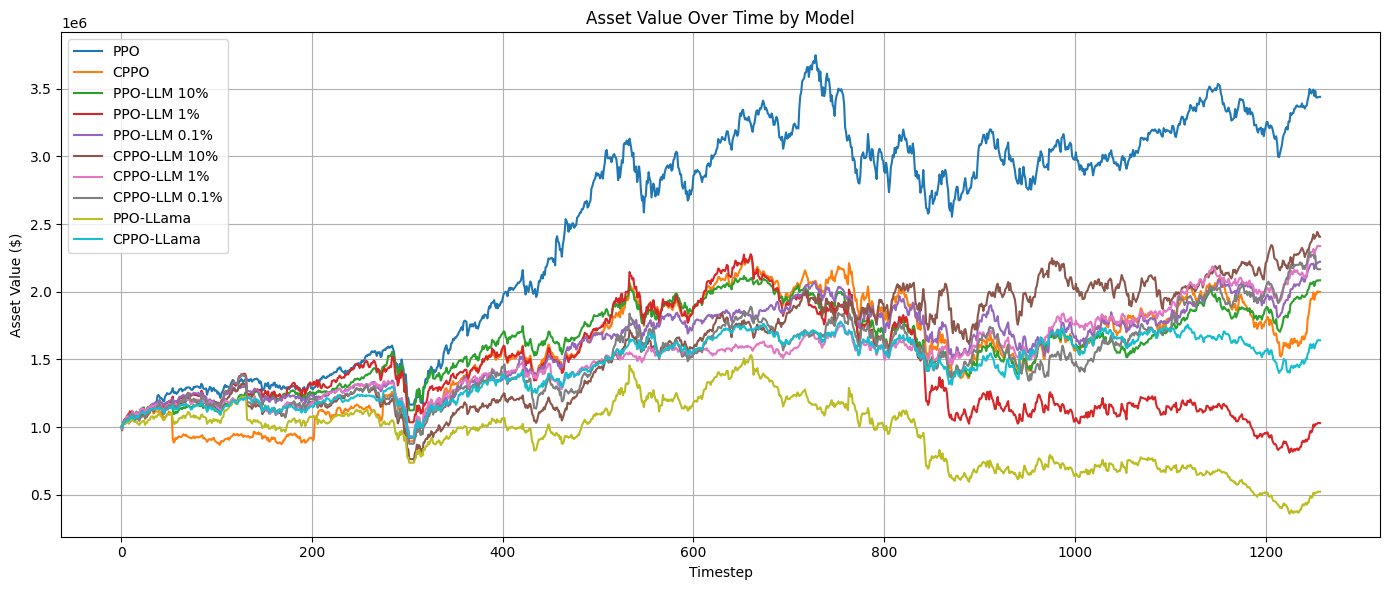

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary of model names and their asset series
asset_data = {
    "PPO": pd.Series(df_assets_ppo),
    "CPPO": pd.Series(df_assets_cppo),
    "PPO-LLM 10%": pd.Series(df_assets_ppo_llm),
    "PPO-LLM 1%": pd.Series(df_assets_ppo_llm_1),
    "PPO-LLM 0.1%": pd.Series(df_assets_ppo_llm_01),
    "CPPO-LLM 10%": pd.Series(df_assets_cppo_llm_risk),
    "CPPO-LLM 1%": pd.Series(df_assets_cppo_llm_risk_1),
    "CPPO-LLM 0.1%": pd.Series(df_assets_cppo_llm_risk_01),
    "PPO-LLama": pd.Series(df_assets_ppo_llama),
    "CPPO-LLama": pd.Series(df_assets_cppo_llama_risk),
}

# Combine into one DataFrame
df_all_assets = pd.DataFrame(asset_data)

# Plot
plt.figure(figsize=(14, 6))
for column in df_all_assets.columns:
    plt.plot(df_all_assets[column], label=column)

plt.title("Asset Value Over Time by Model")
plt.xlabel("Timestep")
plt.ylabel("Asset Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


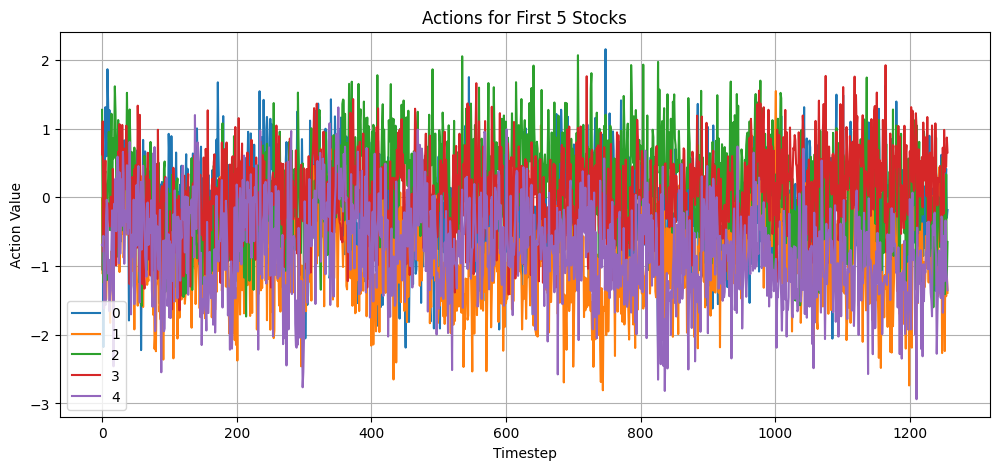

In [11]:
import numpy as np

# Convert to DataFrame for visualization
actions_array = np.array(df_actions_ppo_llm)
df_actions = pd.DataFrame(actions_array)

# Plot action distribution for a few stocks
df_actions.iloc[:, :5].plot(figsize=(12, 5), title="Actions for First 5 Stocks")
plt.xlabel("Timestep")
plt.ylabel("Action Value")
plt.grid(True)
plt.show()


# Part 3 Compare Nasdaq Baseline

In [12]:
TRAIN_START_DATE = '2013-01-01'
TRAIN_END_DATE = '2018-12-31'
TRADE_START_DATE = '2019-01-01'
TRADE_END_DATE = '2023-12-31'

df_dji = YahooDownloader(
    start_date=TRADE_START_DATE, end_date=TRADE_END_DATE, ticker_list=["ndx"]
).fetch_data()

YF deprecation warning: set proxy via new config function: yf.set_config(proxy=proxy)


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (937, 8)


In [13]:
len(df_dji)
df_dji[:10]

df_dji = df_dji[["date", "close"]]
fst_day = df_dji["close"][0]
dji = pd.merge(
    df_dji["date"],
    df_dji["close"].div(fst_day).mul(1000000),
    how="outer",
    left_index=True,
    right_index=True,
).set_index("date")

fst_day = df_dji["close"].iloc[0]  # Safely get the first value
df_dji_normalized_close = list(df_dji["close"].div(fst_day).mul(1000000))

len(df_dji_normalized_close)
df_dji_normalized_close[:10]

[1000000.0,
 1010016.9408069062,
 1008178.2922710378,
 1011107.5097403742,
 1011760.9892339536,
 1021104.5455352288,
 1011554.0386705135,
 992522.4872769522,
 953957.039443423,
 928241.2003173721]

In [14]:
fst_day_ppo = df_assets_ppo[1]  # Safely get the first value
df_assets_ppo_series = pd.Series(df_assets_ppo[1:])
df_ppo_normalized_close = list(df_assets_ppo_series.div(fst_day_ppo).mul(1000000))

# Normalize PPO-DeepSeek 10%
fst_day_ppo_llm = df_assets_ppo_llm[1]  # Safely get the first value
df_assets_ppo_llm_series = pd.Series(df_assets_ppo_llm[1:])
df_ppo_llm_normalized_close = list(df_assets_ppo_llm_series.div(fst_day_ppo_llm).mul(1000000))

# Normalize PPO-DeepSeek 1%
fst_day_ppo_llm_1 = df_assets_ppo_llm_1[1]  # Safely get the first value
df_assets_ppo_llm_series_1 = pd.Series(df_assets_ppo_llm_1[1:])
df_ppo_llm_normalized_close_1 = list(df_assets_ppo_llm_series_1.div(fst_day_ppo_llm_1).mul(1000000))

# Normalize PPO-DeepSeek 0.1%
#fst_day_ppo_llm_01 = df_assets_ppo_llm_01[1]  # Safely get the first value
#df_assets_ppo_llm_series_01 = pd.Series(df_assets_ppo_llm_01[1:])
#df_ppo_llm_normalized_close_01 = list(df_assets_ppo_llm_series_01.div(fst_day_ppo_llm_01).mul(1000000))

# prompt: repeat the same renormalization as above for cppo, cppo_llm_risk and ppo_llm

fst_day_ppo_llama = df_assets_ppo_llama[1]  # Safely get the first value
df_assets_ppo_llama_series = pd.Series(df_assets_ppo_llama[1:])
df_ppo_llama_normalized_close = list(df_assets_ppo_llama_series.div(fst_day_ppo_llama).mul(1000000))


fst_day_cppo = df_assets_cppo[1]  # Safely get the first value
df_assets_cppo_series = pd.Series(df_assets_cppo[1:])
df_cppo_normalized_close = list(df_assets_cppo_series.div(fst_day_cppo).mul(1000000))

# Normalize CPPO-DeepSeek 10%
fst_day_cppo_llm_risk = df_assets_cppo_llm_risk[1]  # Safely get the first value
df_assets_cppo_llm_risk_series = pd.Series(df_assets_cppo_llm_risk[1:])
df_cppo_llm_risk_normalized_close = list(df_assets_cppo_llm_risk_series.div(fst_day_cppo_llm_risk).mul(1000000))

# Normalize CPPO-DeepSeek 1%
fst_day_cppo_llm_risk_1 = df_assets_cppo_llm_risk_1[1]  # Safely get the first value
df_assets_cppo_llm_risk_series_1 = pd.Series(df_assets_cppo_llm_risk_1[1:])
df_cppo_llm_risk_normalized_close_1 = list(df_assets_cppo_llm_risk_series_1.div(fst_day_cppo_llm_risk_1).mul(1000000))

# Normalize CPPO-DeepSeek 0.1%
fst_day_cppo_llm_risk_01 = df_assets_cppo_llm_risk_01[1]  # Safely get the first value
df_assets_cppo_llm_risk_series_01 = pd.Series(df_assets_cppo_llm_risk_01[1:])
df_cppo_llm_risk_normalized_close_01 = list(df_assets_cppo_llm_risk_series_01.div(fst_day_cppo_llm_risk_01).mul(1000000))

# prompt: repeat the same renormalization as above for cppo, cppo_llama_risk and ppo_llama

fst_day_cppo_llama_risk = df_assets_cppo_llama_risk[1]  # Safely get the first value
df_assets_cppo_llama_risk_series = pd.Series(df_assets_cppo_llama_risk[1:])
df_cppo_llama_risk_normalized_close = list(df_assets_cppo_llama_risk_series.div(fst_day_cppo_llama_risk).mul(1000000))

len(trade['date'].drop_duplicates().values)

def filter_to_common_dates(trade, df_dji, df_assets_ppo, df_dji_normalized_close):
    """
    Filters df_assets_ppo and df_dji_normalized_close based on the common dates from trade and df_dji.

    Parameters:
        trade (pd.DataFrame): DataFrame containing a 'date' column for the trade data.
        df_dji (pd.DataFrame): DataFrame containing a 'date' column for DJI data.
        df_assets_ppo (list or array-like): Values corresponding to trade['date'].
        df_dji_normalized_close (list or array-like): Values corresponding to df_dji['date'].

    Returns:
        pd.Series, pd.Series: Filtered series for df_assets_ppo and df_dji_normalized_close.
    """
    # Extract unique trading dates from trade and DJI dates
    trade_dates = pd.to_datetime(trade['date'].unique())
    dji_dates = pd.to_datetime(df_dji['date'].unique())


  #  first_date = trade_dates[0]
   # date_before_first = first_date - pd.DateOffset(days=1)

# Prepend the date before the first date to trade_dates
    #trade_dates = pd.DatetimeIndex([date_before_first] + trade_dates.tolist())

    # Convert inputs to pandas Series with their respective dates as indices
    df_assets_ppo_series = pd.Series(df_assets_ppo, index=trade_dates)
    df_dji_normalized_close_series = pd.Series(df_dji_normalized_close, index=dji_dates)

    # Find the common dates
    common_dates = trade_dates.intersection(dji_dates)

    # Filter both series to the common dates
    df_assets_ppo_filtered = df_assets_ppo_series.reindex(common_dates)
    df_dji_normalized_close_filtered = df_dji_normalized_close_series.reindex(common_dates)

    # Return the filtered series
    return df_assets_ppo_filtered, df_dji_normalized_close_filtered, common_dates

In [15]:
df_assets_ppo_filtered, df_dji_normalized_close_filtered, common_dates = filter_to_common_dates(trade, df_dji, df_ppo_normalized_close, df_dji_normalized_close)
df_assets_cppo_filtered, df_dji_normalized_close_filtered, common_dates = filter_to_common_dates(trade, df_dji, df_cppo_normalized_close, df_dji_normalized_close)

df_assets_ppo_llm_filtered, df_dji_normalized_close_filtered, common_dates = filter_to_common_dates(trade, df_dji, df_ppo_llm_normalized_close, df_dji_normalized_close)
df_assets_ppo_llm_filtered_1, _, _ = filter_to_common_dates(
    trade, df_dji, df_ppo_llm_normalized_close_1, df_dji_normalized_close
)

#df_assets_ppo_llm_filtered_01, _, _ = filter_to_common_dates(
   # trade, df_dji, df_ppo_llm_normalized_close_01, df_dji_normalized_close
#)
df_assets_ppo_llama_filtered, df_dji_normalized_close_filtered, common_dates = filter_to_common_dates(trade, df_dji, df_ppo_llama_normalized_close, df_dji_normalized_close)

df_assets_cppo_llm_risk_filtered, df_dji_normalized_close_filtered, common_dates = filter_to_common_dates(trade, df_dji, df_cppo_llm_risk_normalized_close, df_dji_normalized_close)
df_assets_cppo_llm_risk_filtered_1, _, _ = filter_to_common_dates(
    trade, df_dji, df_cppo_llm_risk_normalized_close_1, df_dji_normalized_close
)

df_assets_cppo_llm_risk_filtered_01, _, _ = filter_to_common_dates(
    trade, df_dji, df_cppo_llm_risk_normalized_close_01, df_dji_normalized_close
)
#df_assets_cppo_llama_risk_filtered, df_dji_normalized_close_filtered, common_dates = filter_to_common_dates(trade, df_dji, df_cppo_llama_risk_normalized_close, df_dji_normalized_close)

df_dji_normalized_close_filtered[1]

result = pd.DataFrame(
    {
        "PPO 100 epochs": df_assets_ppo_filtered,
        "CPPO 100 epochs": df_assets_cppo_filtered,
        "PPO-DeepSeek 100 epochs": df_assets_ppo_llm_filtered,
    #    "PPO-Llama 100 epochs": df_assets_ppo_llama_filtered,
        "CPPO-DeepSeek 100 epochs": df_assets_cppo_llm_risk_filtered,
    #    "CPPO-Llama 20 epochs": df_assets_cppo_llama_risk_filtered,
        "Nasdaq-100 index": df_dji_normalized_close_filtered,
    }
)

result_cppo = pd.DataFrame(
    {
        #"PPO 100 epochs": df_assets_ppo_filtered,
        "CPPO": df_assets_cppo_filtered,
        "CPPO-DeepSeek 10%": df_assets_cppo_llm_risk_filtered,
        "CPPO-DeepSeek 1%": df_assets_cppo_llm_risk_filtered_1,
        "CPPO-DeepSeek 0.1%": df_assets_cppo_llm_risk_filtered_01,
        "Nasdaq-100 index": df_dji_normalized_close_filtered,
    }
)

# Display the result
print(result)



            PPO 100 epochs  CPPO 100 epochs  PPO-DeepSeek 100 epochs  \
2020-02-11    1.609173e+06     1.241447e+06             1.533205e+06   
2020-02-12    1.599777e+06     1.248944e+06             1.527244e+06   
2020-02-13    1.602252e+06     1.245290e+06             1.532783e+06   
2020-02-14    1.608515e+06     1.252448e+06             1.542987e+06   
2020-02-18    1.616547e+06     1.270671e+06             1.563854e+06   
...                    ...              ...                      ...   
2023-12-21    3.465172e+06     1.994136e+06             2.089028e+06   
2023-12-22    3.466818e+06     2.014342e+06             2.094538e+06   
2023-12-26    3.467570e+06     2.015701e+06             2.092446e+06   
2023-12-27    3.470940e+06     2.011163e+06             2.094879e+06   
2023-12-28    3.470940e+06     2.011163e+06             2.094879e+06   

            CPPO-DeepSeek 100 epochs  Nasdaq-100 index  
2020-02-11              1.203485e+06      1.000000e+06  
2020-02-12           

<ipython-input-15-107ac80d6b74>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_dji_normalized_close_filtered[1]


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Utility Functions
def calculate_metric(returns_strategy, returns_benchmark, confidence_level=0.05, upside_confidence=0.95):
    """Calculate performance metrics: IR, CVaR, and Rachev Ratio."""
    excess_return = returns_strategy - returns_benchmark
    ir = excess_return.mean() / excess_return.std()
    var = np.percentile(returns_strategy, confidence_level * 100)
    cvar = returns_strategy[returns_strategy <= var].mean()
    upside_var = np.percentile(returns_strategy, upside_confidence * 100)
    downside_var = var
    rachev_ratio = returns_strategy[returns_strategy >= upside_var].mean() / abs(returns_strategy[returns_strategy <= downside_var].mean())
    return {"Information Ratio": ir, "CVaR": cvar, "Rachev Ratio": rachev_ratio}

def align_returns(result, col_strategy, col_benchmark):
    """Align returns for strategy and benchmark."""
    returns_strategy = result[col_strategy].pct_change().dropna()
    returns_benchmark = result[col_benchmark].pct_change().dropna()
    return returns_strategy.align(returns_benchmark, join="inner")

# Metrics Calculation
def compute_metrics(result, strategies, benchmark, confidence_level=0.05, upside_confidence=0.95):
    """
    Compute metrics for multiple strategies compared to a benchmark.

    Parameters:
        result (pd.DataFrame): DataFrame with strategies and benchmark columns.
        strategies (list): List of strategy column names.
        benchmark (str): Benchmark column name.
        confidence_level (float): Confidence level for CVaR calculation.
        upside_confidence (float): Confidence level for upside in Rachev Ratio.

    Returns:
        dict: Performance metrics for each strategy.
    """
    metrics = {}
    for strategy in strategies:
        aligned_strategy, aligned_benchmark = align_returns(result, strategy, benchmark)
        metrics[strategy] = calculate_metric(
            aligned_strategy, aligned_benchmark, confidence_level, upside_confidence
        )
    return metrics

# Plotting
def plot_cumulative_returns(result, metrics, strategies, benchmark):
    """
    Plot cumulative returns for strategies and benchmark with annotated metrics.

    Parameters:
        result (pd.DataFrame): DataFrame with strategies and benchmark.
        metrics (dict): Performance metrics.
        strategies (list): List of strategy column names.
        benchmark (str): Benchmark column name.
    """
    plt.figure(figsize=(12, 6))
    for strategy in strategies:
        cumulative_returns = (1 + result[strategy].pct_change().dropna()).cumprod()
        plt.plot(cumulative_returns, label=f"{strategy}")
    cumulative_benchmark = (1 + result[benchmark].pct_change().dropna()).cumprod()
    plt.plot(cumulative_benchmark, label=f"{benchmark} (Benchmark)")
    plt.title("Cumulative Returns with Performance Metrics")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.grid()
    plt.show()

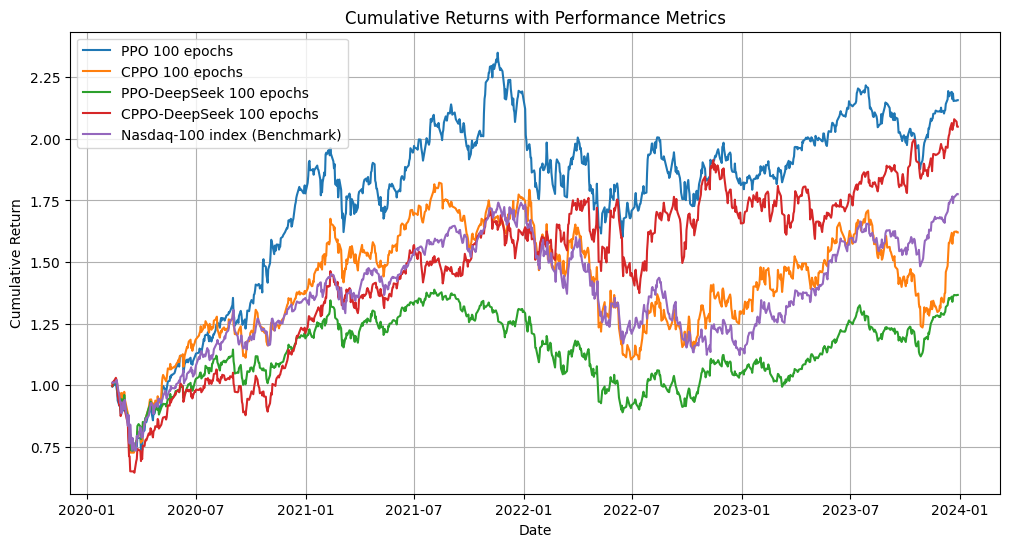

PPO 100 epochs Metrics:
  Information Ratio: 0.0075
  CVaR: -0.0371
  Rachev Ratio: 1.0885
CPPO 100 epochs Metrics:
  Information Ratio: -0.0022
  CVaR: -0.0427
  Rachev Ratio: 1.1179
PPO-DeepSeek 100 epochs Metrics:
  Information Ratio: -0.0134
  CVaR: -0.0362
  Rachev Ratio: 1.0064
CPPO-DeepSeek 100 epochs Metrics:
  Information Ratio: 0.0063
  CVaR: -0.0423
  Rachev Ratio: 0.9810


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Utility Functions
def calculate_metric(returns_strategy, returns_benchmark, confidence_level=0.05, upside_confidence=0.95):
    """Calculate performance metrics: IR, CVaR, and Rachev Ratio."""
    excess_return = returns_strategy - returns_benchmark
    ir = excess_return.mean() / excess_return.std()
    var = np.percentile(returns_strategy, confidence_level * 100)
    cvar = returns_strategy[returns_strategy <= var].mean()
    upside_var = np.percentile(returns_strategy, upside_confidence * 100)
    downside_var = var
    rachev_ratio = returns_strategy[returns_strategy >= upside_var].mean() / abs(returns_strategy[returns_strategy <= downside_var].mean())
    return {"Information Ratio": ir, "CVaR": cvar, "Rachev Ratio": rachev_ratio}

def align_returns(result, col_strategy, col_benchmark):
    """Align returns for strategy and benchmark."""
    returns_strategy = result[col_strategy].pct_change().dropna()
    returns_benchmark = result[col_benchmark].pct_change().dropna()
    return returns_strategy.align(returns_benchmark, join="inner")

# Metrics Calculation
def compute_metrics(result, strategies, benchmark, confidence_level=0.05, upside_confidence=0.95):
    """
    Compute metrics for multiple strategies compared to a benchmark.

    Parameters:
        result (pd.DataFrame): DataFrame with strategies and benchmark columns.
        strategies (list): List of strategy column names.
        benchmark (str): Benchmark column name.
        confidence_level (float): Confidence level for CVaR calculation.
        upside_confidence (float): Confidence level for upside in Rachev Ratio.

    Returns:
        dict: Performance metrics for each strategy.
    """
    metrics = {}
    for strategy in strategies:
        aligned_strategy, aligned_benchmark = align_returns(result, strategy, benchmark)
        metrics[strategy] = calculate_metric(
            aligned_strategy, aligned_benchmark, confidence_level, upside_confidence
        )
    return metrics

# Plotting
def plot_cumulative_returns(result, metrics, strategies, benchmark):
    """
    Plot cumulative returns for strategies and benchmark with annotated metrics.

    Parameters:
        result (pd.DataFrame): DataFrame with strategies and benchmark.
        metrics (dict): Performance metrics.
        strategies (list): List of strategy column names.
        benchmark (str): Benchmark column name.
    """
    plt.figure(figsize=(12, 6))
    for strategy in strategies:
        cumulative_returns = (1 + result[strategy].pct_change().dropna()).cumprod()
        plt.plot(cumulative_returns, label=f"{strategy}")
    cumulative_benchmark = (1 + result[benchmark].pct_change().dropna()).cumprod()
    plt.plot(cumulative_benchmark, label=f"{benchmark} (Benchmark)")
    plt.title("Cumulative Returns with Performance Metrics")
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.grid()
    plt.show()

# Example Usage
# Assuming `result` DataFrame is prepared with "PPO 25 epochs", "CPPO 25 epochs", and "Nasdaq-100 index"
strategies = [
"PPO 100 epochs",
"CPPO 100 epochs",
"PPO-DeepSeek 100 epochs",
#"PPO-Llama 100 epochs",
"CPPO-DeepSeek 100 epochs"
#"CPPO-Llama 100 epochs",
]
#strategies = ["PPO 20 epochs", "CPPO 20 epochs", "CPPO-DeepSeek 20 epochs"]
benchmark = "Nasdaq-100 index"
metrics = compute_metrics(result, strategies, benchmark)
plot_cumulative_returns(result, metrics, strategies, benchmark)

# Print metrics
for strategy, strategy_metrics in metrics.items():
    print(f"{strategy} Metrics:")
    for metric_name, value in strategy_metrics.items():
        print(f"  {metric_name}: {value:.4f}")

['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG', 'BKR', 'CDNS', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EBAY', 'ENPH', 'EXC', 'FANG', 'FAST', 'FTNT', 'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'LRCX', 'LULU', 'MAR', 'MCHP', 'MDLZ', 'MELI', 'META', 'MNST', 'MRVL', 'MSFT', 'MU', 'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ON', 'ORLY', 'PANW', 'PAYX', 'PCAR', 'PEP', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SIRI', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL']
1257


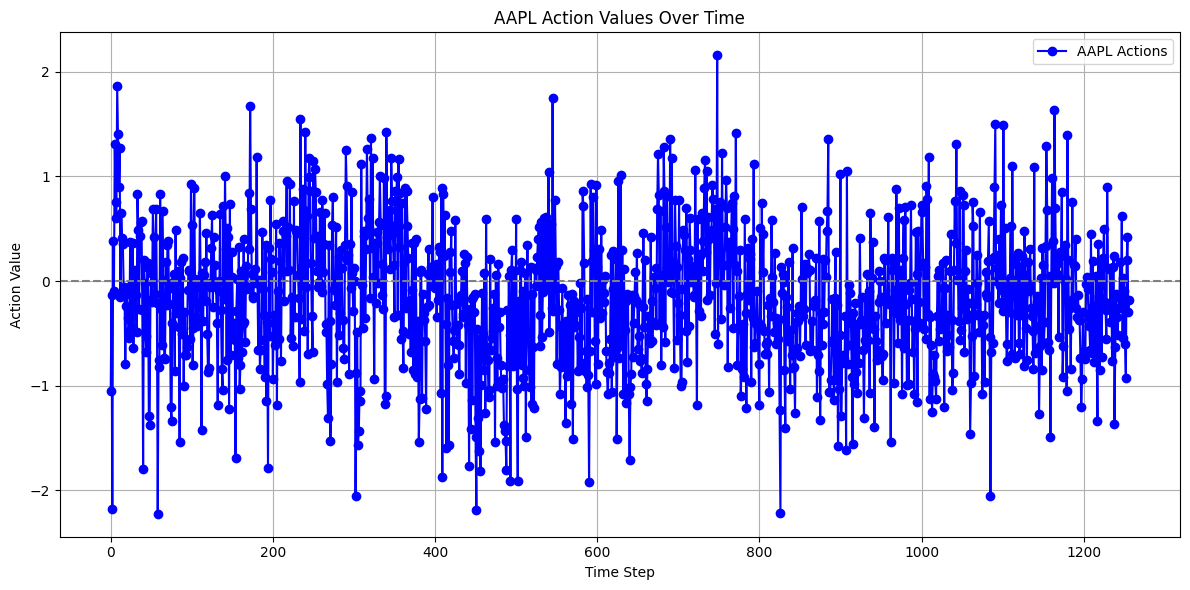

In [18]:
stock_list = trade.tic.unique().tolist()
print(stock_list)
print(len(df_actions_ppo_llm))
aapl_actions = [action[0] for action in df_actions_ppo_llm]

plt.figure(figsize=(12, 6))
plt.plot(aapl_actions, marker='o', linestyle='-', color='blue', label='AAPL Actions')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("AAPL Action Values Over Time")
plt.xlabel("Time Step")
plt.ylabel("Action Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 4 Real Time 60d Prediction

In [19]:
import yfinance as yf
import pandas as pd
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader

from datetime import datetime, timedelta

# Set end date as today
TRADE_END_DATE_1 = datetime.today().strftime('%Y-%m-%d')

# Set start date as 60 days before today
TRADE_START_DATE_1 = (datetime.today() - timedelta(days=60)).strftime('%Y-%m-%d')

print(f"TRADE_END_DATE_1 = '{TRADE_END_DATE_1}'")
print(f"TRADE_START_DATE_1 = '{TRADE_START_DATE_1}'")


df_raw = YahooDownloader(start_date = TRADE_START_DATE_1,
                     end_date = TRADE_END_DATE_1,
                     ticker_list = stock_list).fetch_data()

TRADE_END_DATE_1 = '2025-05-09'
TRADE_START_DATE_1 = '2025-03-10'


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (3612, 8)


In [20]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split


print(df_raw.info())   # Prints column data types and non-null counts
print(df_raw.shape)    # Prints the dimensions (rows, columns)
print(df_raw.columns)

fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_vix=True,
                     use_turbulence=False,  #error
                     user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3612 non-null   object 
 1   close   3612 non-null   float64
 2   high    3612 non-null   float64
 3   low     3612 non-null   float64
 4   open    3612 non-null   float64
 5   volume  3612 non-null   int64  
 6   tic     3612 non-null   object 
 7   day     3612 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 211.8+ KB
None
(3612, 8)
Index(['date', 'close', 'high', 'low', 'open', 'volume', 'tic', 'day'], dtype='object', name='Price')
Successfully added technical indicators


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (42, 8)
Successfully added vix


In [21]:
processed.head()

,date,close,high,low,open,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix
0,2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200,AAPL,0,0.0,233.550373,214.769619,0.0,-66.666667,100.0,227.479996,227.479996,27.860001
1,2025-03-10,435.079987,444.540009,433.230011,443.109985,4001600,ADBE,0,0.0,233.550373,214.769619,0.0,-66.666667,100.0,435.079987,435.079987,27.860001
2,2025-03-10,216.259995,221.149994,213.149994,220.220001,4946600,ADI,0,0.0,233.550373,214.769619,0.0,-66.666667,100.0,216.259995,216.259995,27.860001
3,2025-03-10,301.384064,309.339996,301.579987,306.200012,2991400,ADP,0,0.0,233.550373,214.769619,0.0,-66.666667,100.0,301.384064,301.384064,27.860001
4,2025-03-10,248.399994,256.929993,246.309998,256.609985,3198600,ADSK,0,0.0,233.550373,214.769619,0.0,-66.666667,100.0,248.399994,248.399994,27.860001


In [22]:
trade.head()
trade.info()
print(trade.index)
print(trade.index.name)

<class 'pandas.core.frame.DataFrame'>
Index: 105588 entries, 0 to 1256
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          105588 non-null  object 
 1   tic           105588 non-null  object 
 2   close         105588 non-null  float64
 3   high          105588 non-null  float64
 4   low           105588 non-null  float64
 5   open          105588 non-null  float64
 6   volume        105588 non-null  float64
 7   day           105588 non-null  float64
 8   macd          105588 non-null  float64
 9   boll_ub       105588 non-null  float64
 10  boll_lb       105588 non-null  float64
 11  rsi_30        105588 non-null  float64
 12  cci_30        105588 non-null  float64
 13  dx_30         105588 non-null  float64
 14  close_30_sma  105588 non-null  float64
 15  close_60_sma  105588 non-null  float64
 16  vix           105588 non-null  float64
 17  turbulence    105588 non-null  float64
dtypes: float64(

In [23]:
#can rerun to get different results

desired_order = ['date', 'tic', 'close', 'high', 'low', 'open', 'volume', 'day',
                 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30',
                 'close_30_sma', 'close_60_sma', 'vix']
processed = processed[desired_order]
processed['turbulence'] = 0



# Create a new index based on unique dates
unique_dates = processed['date'].unique()
date_to_idx = {date: idx for idx, date in enumerate(unique_dates)}

# Create new index based on the date mapping
processed['new_idx'] = processed['date'].map(date_to_idx)

# Set this as the index
processed = processed.set_index('new_idx')

e_trade_gym_60d = StockTradingEnv(df = processed, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)

#e_trade_gym_60d_c = StockTradingEnv(df = processed, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs_llm_risk)

df_assets_ppo_60d, df_account_value_ppo_60d, df_actions_ppo_60d, df_portfolio_distribution_ppo_60d = DRL_prediction(act=loaded_ppo, environment=e_trade_gym_60d)

#df_assets_cppo_60d, df_account_value_cppo_60d, df_actions_cppo_60d, df_portfolio_distribution_cppo_60d = DRL_prediction(act=loaded_cppo_llm_risk, environment=e_trade_gym_60d_c)


Test Finished!


Test Finished!


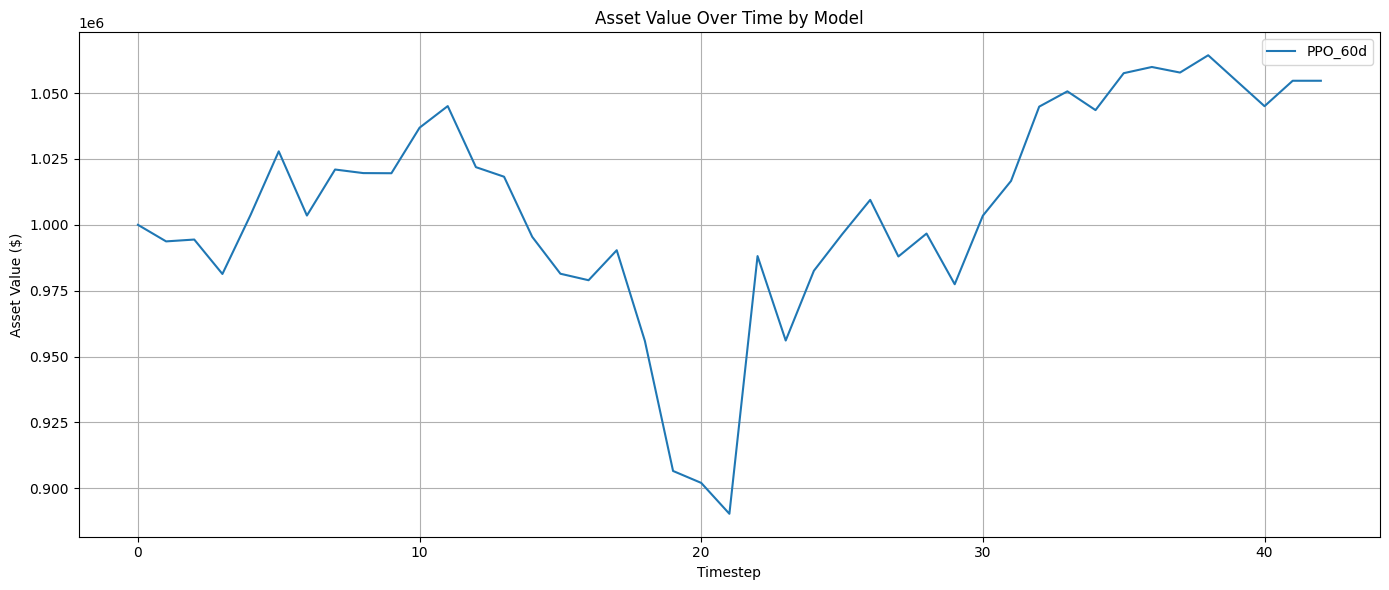

In [30]:
#can rerun to get different results

desired_order = ['date', 'tic', 'close', 'high', 'low', 'open', 'volume', 'day',
                 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30',
                 'close_30_sma', 'close_60_sma', 'vix']
processed = processed[desired_order]
processed['turbulence'] = 0

# Create a new index based on unique dates
unique_dates = processed['date'].unique()
date_to_idx = {date: idx for idx, date in enumerate(unique_dates)}

# Create new index based on the date mapping
processed['new_idx'] = processed['date'].map(date_to_idx)

# Set this as the index
processed = processed.set_index('new_idx')

e_trade_gym_60d = StockTradingEnv(df = processed, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)

#e_trade_gym_60d_c = StockTradingEnv(df = processed, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs_llm_risk)

df_assets_ppo_60d, df_account_value_ppo_60d, df_actions_ppo_60d, df_portfolio_distribution_ppo_60d = DRL_prediction(act=loaded_ppo, environment=e_trade_gym_60d)

#df_assets_cppo_60d, df_account_value_cppo_60d, df_actions_cppo_60d, df_portfolio_distribution_cppo_60d = DRL_prediction(act=loaded_cppo_llm_risk, environment=e_trade_gym_60d_c)


import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary of model names and their asset series
asset_data = {
    "PPO_60d": df_assets_ppo_60d
}

# Combine into one DataFrame
df_all_assets = pd.DataFrame(asset_data)

# Plot
plt.figure(figsize=(14, 6))
for column in df_all_assets.columns:
    plt.plot(df_all_assets[column], label=column)

plt.title("Asset Value Over Time by Model")
plt.xlabel("Timestep")
plt.ylabel("Asset Value ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG', 'BKR', 'CDNS', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EBAY', 'ENPH', 'EXC', 'FANG', 'FAST', 'FTNT', 'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'LRCX', 'LULU', 'MAR', 'MCHP', 'MDLZ', 'MELI', 'META', 'MNST', 'MRVL', 'MSFT', 'MU', 'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ON', 'ORLY', 'PANW', 'PAYX', 'PCAR', 'PEP', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SIRI', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL']
TSLA is at index 76
[np.float32(0.5107878), np.float32(1.1205653), np.float32(-0.72462636), np.float32(-0.5093338), np.float32(0.029654145), np.float32(-0.26712346), np.float32(-2.0734193), np.float32(-0.19939178), np.float32(-0.41425225), np.float32(-1.5065248), np.float32(-0.68067575), np.float32(-1.1280608), np.float32(-0.623383), np.float32(

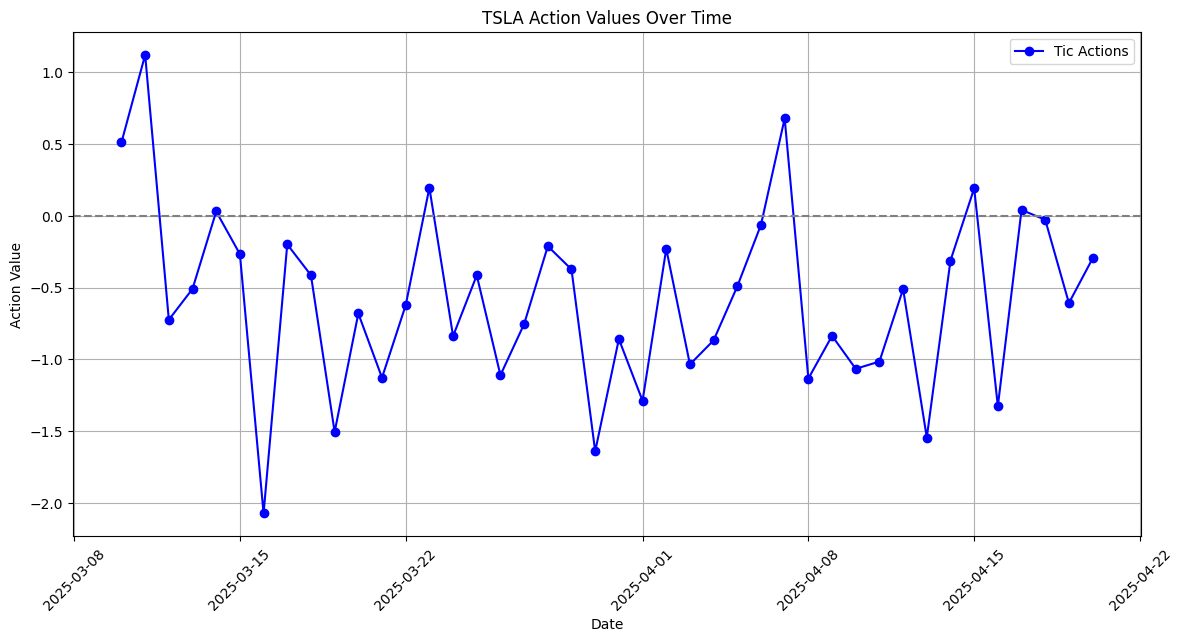

In [44]:
print(stock_list)

import matplotlib.pyplot as plt
import pandas as pd

index = 44

if 'TSLA' in stock_list:
    index = stock_list.index('TSLA')
    print(f"TSLA is at index {index}")
else:
    print("TSLA not found in stock_list")

actions_stock = [action[index] for action in df_actions_ppo_60d]
print(actions_stock)
stock_name = stock_list[index]
print(stock_name)

TRAIN_START_DATE = pd.to_datetime(TRADE_START_DATE_1)  # Adjust the year if necessary
date_range = pd.date_range(start=TRADE_START_DATE_1, periods=len(actions_stock), freq='D')

# Plot the AAPL actions with dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(date_range, actions_stock, marker='o', linestyle='-', color='blue', label='Tic Actions')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title(f"{stock_name} Action Values Over Time")
plt.xlabel("Date")
plt.ylabel("Action Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [26]:
import pandas as pd

# Assuming your lists are named as df_assets_ppo_60d, df_account_value_ppo_60d, etc.
# You need to convert the lists to DataFrames first

df_assets_ppo_60d = pd.DataFrame(df_assets_ppo_60d)
df_account_value_ppo_60d = pd.DataFrame(df_account_value_ppo_60d)
df_actions_ppo_60d = pd.DataFrame(df_actions_ppo_60d)
df_portfolio_distribution_ppo_60d = pd.DataFrame(df_portfolio_distribution_ppo_60d)

# Assuming you want to export them to the '/content' directory
df_assets_ppo_60d.to_csv('/content/df_assets_ppo_60d.csv', index=False)
df_account_value_ppo_60d.to_csv('/content/df_account_value_ppo_60d.csv', index=False)
df_actions_ppo_60d.to_csv('/content/df_actions_ppo_60d.csv', index=False)
df_portfolio_distribution_ppo_60d.to_csv('/content/df_portfolio_distribution_ppo_60d.csv', index=False)


In [27]:
df_raw.to_csv('/content/df_raw.csv', index=False)
processed.to_csv('/content/processed.csv', index=False)

In [35]:
print(stock_list)

['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG', 'BKR', 'CDNS', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EBAY', 'ENPH', 'EXC', 'FANG', 'FAST', 'FTNT', 'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'KDP', 'KLAC', 'LRCX', 'LULU', 'MAR', 'MCHP', 'MDLZ', 'MELI', 'META', 'MNST', 'MRVL', 'MSFT', 'MU', 'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ON', 'ORLY', 'PANW', 'PAYX', 'PCAR', 'PEP', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SIRI', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL']
